In [1]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import statistics
import scipy.io
import h5py
import sys
PlottingFormat_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from Rastermap import PlotRaster as r

In [3]:
SaveFigureFolder = '/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure1/100dpi/'

## Experimental Animal

### CFC4

In [4]:
ExpDirectoryName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'

In [5]:
exptaskframes = {'Task1': [2430, -120],
             'Task2': [0, -3960],
             'Task3': [0, -2510]}
exptaskstoplot = ['Task1', 'Task2', 'Task3']
remove_laps = {'Task1':0, 'Task2':1, 'Task3':0 }

#### Rastor Plot

In [6]:
d_exp = r(AnimalName='CFC4', FolderName=ExpDirectoryName,
          SaveFigureFolder=SaveFigureFolder, taskstoplot=exptaskstoplot)
Exp_Fdata, Exp_Cdata, Exp_R2data = d_exp.combinedata_correct_forraster(
    exptaskframes, remove_laps)

Loading Data
F (1924, 65000)
Fc (1924, 65000)
Fc3 (1924, 65000)


### Plot distribution of cell transients for sorting

412.26597805035505
1012


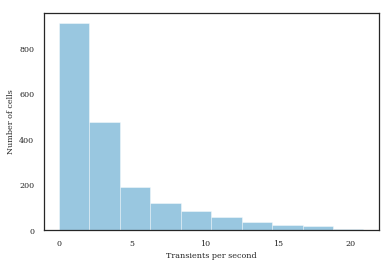

In [7]:
activecells = d_exp.find_transient_distribution(Exp_Fdata, threshold=0.1, transthreshold=2)
print(np.size(activecells))

In [8]:
Exp_Fdata, Exp_Cdata = Exp_Fdata[activecells, :], Exp_Cdata[activecells, :]

In [9]:
d_exp.make_rastermap(Exp_Fdata, Exp_Cdata, ncomp=1)

nmin 200
0.031195640563964844
3.2014658451080322
3.313190460205078
3.3162384033203125
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.33s     0        0.0369      2
0.37s    10        0.1216      4
0.43s    20        0.1798      8
0.49s    30        0.2632      18
0.53s    40        0.3230      28
0.59s    50        0.3233      28
0.63s   final      0.3258
0.63s upsampled    0.3258
(1012, 12772)


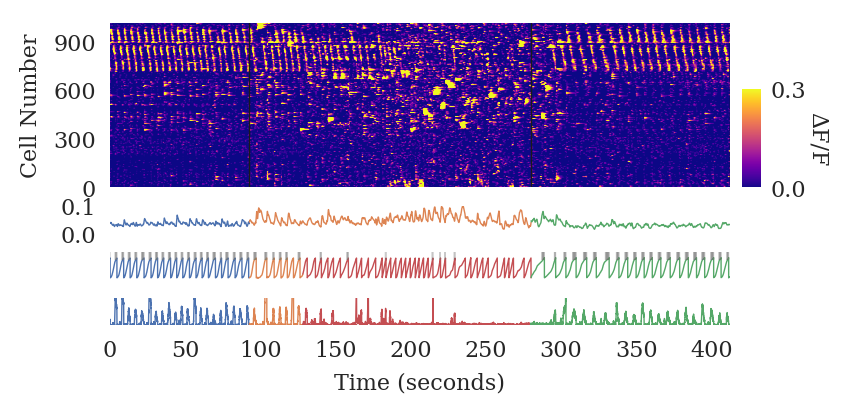

In [10]:
cells_to_use=[[550, 1012], [400, 550], [0, 400]]
d_exp.crop_Sm_and_sort(cells_to_use=cells_to_use, cdata=Exp_Cdata)
fs, ax = plt.subplots(4, sharex='all', dpi=200, gridspec_kw={
                      'height_ratios': [3, 0.5, 0.5, 0.5], 'hspace': 0.3})
d_exp.plot_rastermap(
    fs, ax, fdata=Exp_Fdata, crop_cellflag=1, ylim_meandff=0.1)
d_exp.plot_samplecells([316], axis=ax[3])
fs.set_size_inches((4, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'RasterMap_CFC4_Allcells_withmeandff.pdf'),
#            bbox_inches='tight', transparent=True)

## Plot Field of View

In [52]:
pix, mimg, rimg, onlypix = d_exp.sortcells_toplotfov(Exp_Cdata, cells_to_use=[[0, np.size(activecells)]])

855


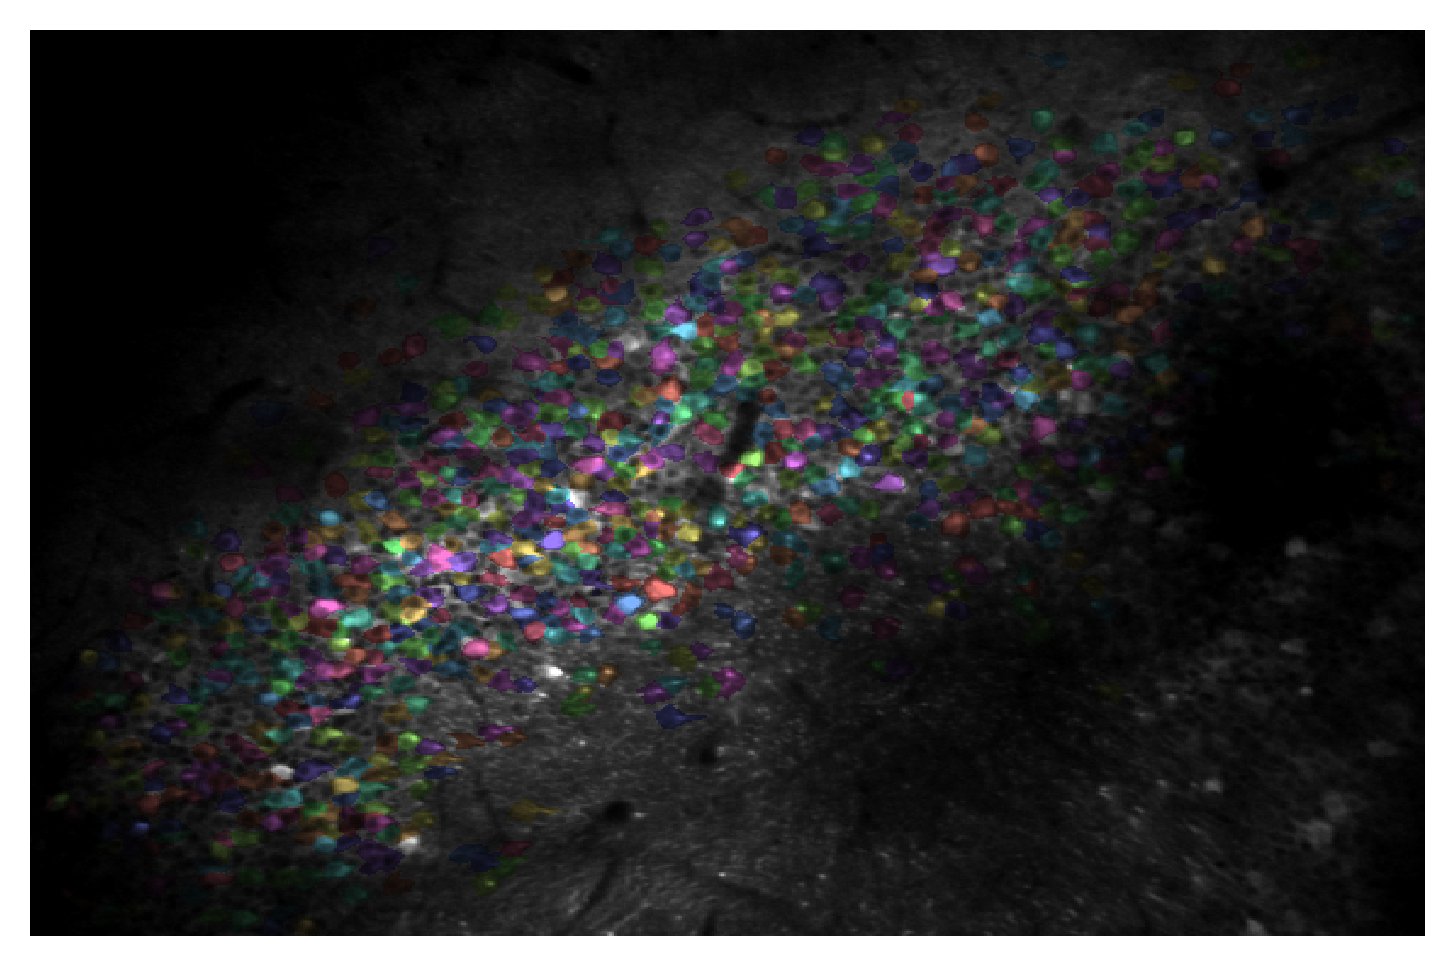

In [53]:
fs, ax = plt.subplots(1, dpi=300)
ax.imshow(pix, aspect='auto', cmap='gray', interpolation='nearest')
ax.axis('off');
ax.margins(0,0)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
fs.savefig(os.path.join(SaveFigureFolder, 'FOV_withtopcells.png'), dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

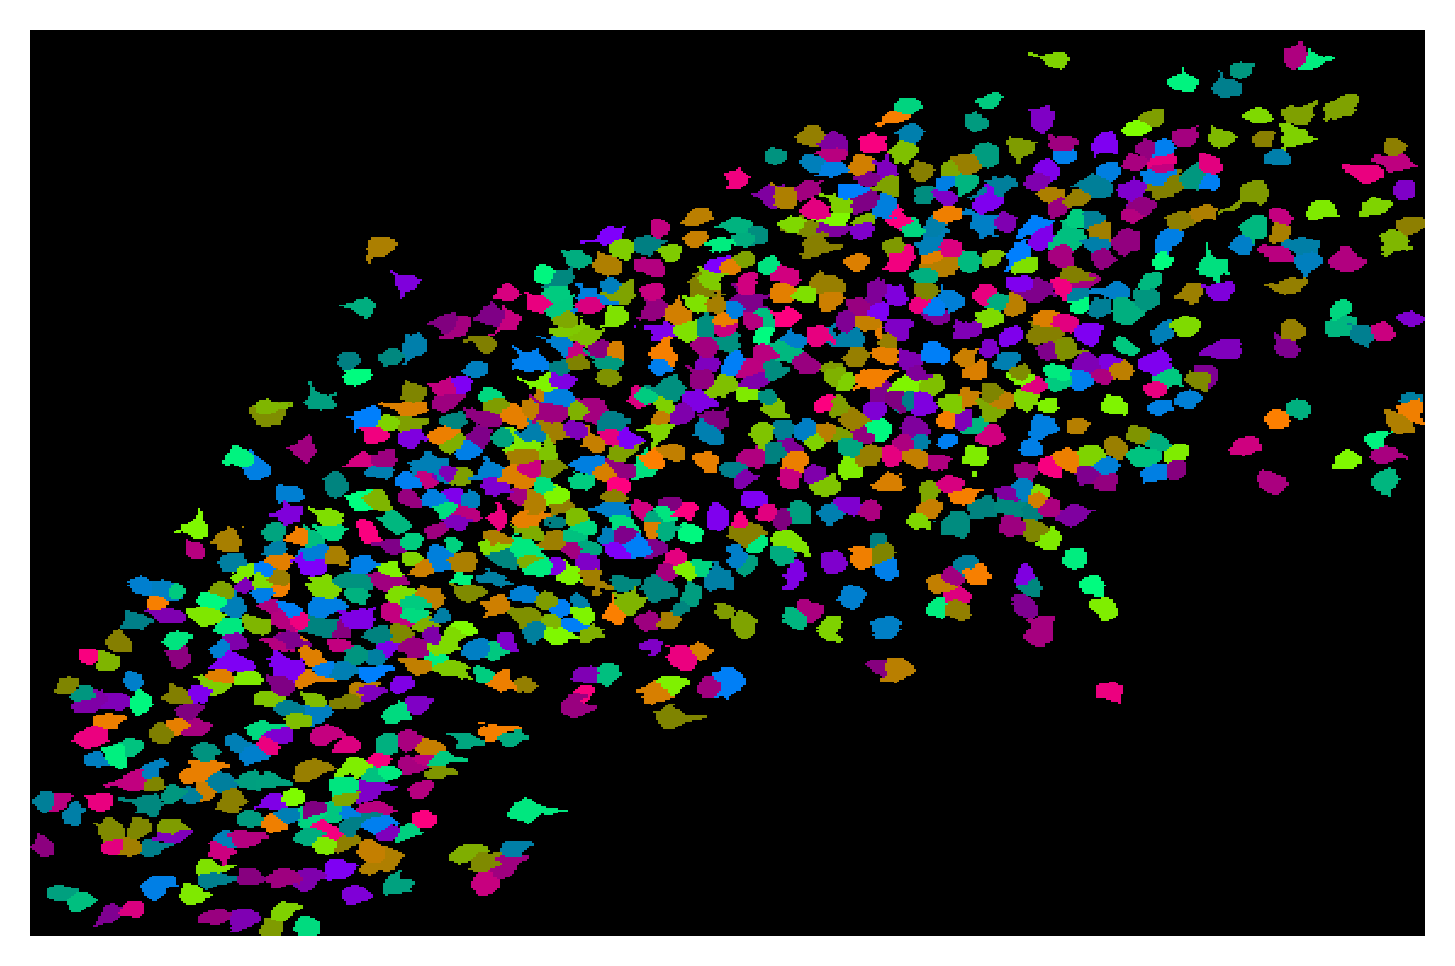

In [54]:
fs, ax = plt.subplots(1, dpi=300)
cmap = plt.cm.gray
cmap.set_bad(color='black')
onlypix[onlypix==1] = 0
ax.imshow(onlypix, aspect='auto', cmap=cmap, interpolation='nearest')
ax.axis('off');
ax.margins(0,0)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
fs.savefig(os.path.join(SaveFigureFolder, 'FOV_withonlymasks.png'), dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

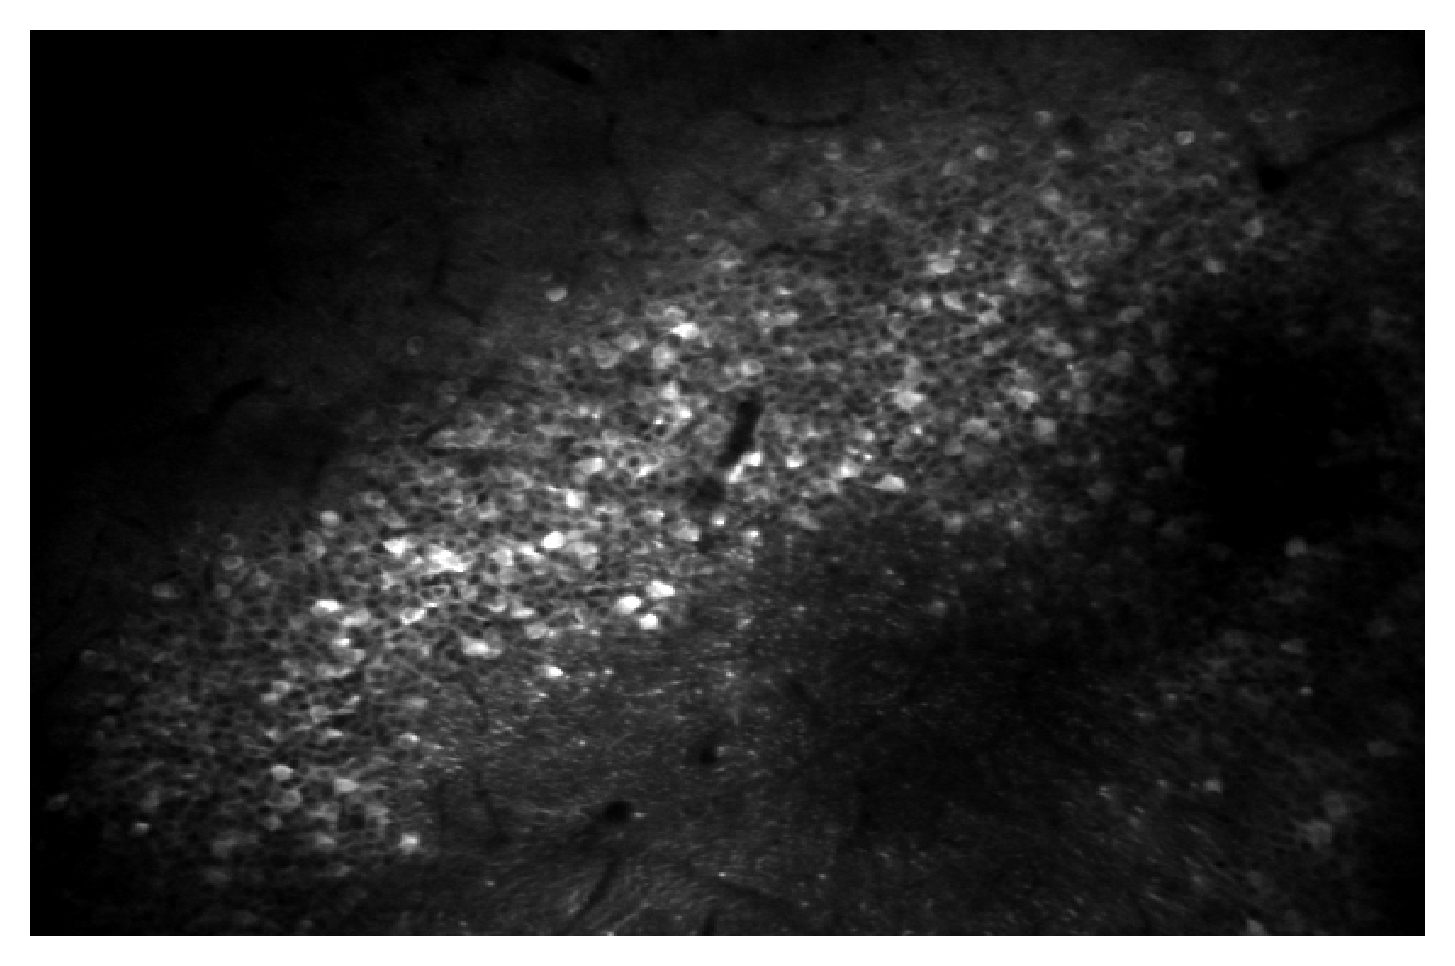

In [55]:
fs, ax = plt.subplots(1, dpi=300)
ax.imshow(mimg, aspect='auto', cmap='gray', interpolation='nearest')
ax.axis('off');
ax.margins(0,0)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
fs.savefig(os.path.join(SaveFigureFolder, 'FOV_referenceImage.png'), dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [14]:
np.save(os.path.join(ExpDirectoryName, 'CFC4', 'isort.npy'), d_exp.isort)
np.save(os.path.join(ExpDirectoryName, 'CFC4', 'activecells.npy'), activecells)
np.save(os.path.join(ExpDirectoryName, 'CFC4', 'corrsort.npy'), d_exp.corr_sort)

#### Correlation Plot

In [15]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

jet = cm.get_cmap('plasma', 256)
greys = cm.get_cmap('gist_gray', 10)(np.linspace(0, 1, 256))
greys[:25, :] = jet(0)
greys = ListedColormap(greys)

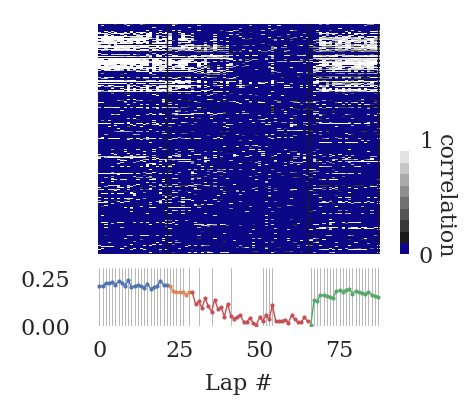

In [16]:
fs, ax = plt.subplots(2, sharex='all', dpi=200, gridspec_kw={
                      'height_ratios': [2, 0.5], 'hspace': 0.1})
d_exp.plot_correlation_with_lick_data(
    fs, Exp_Cdata, ax, cmap=greys, cells_to_use=cells_to_use, ylim=0.3)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Correlation_CFC4_Experiment_Test.pdf'),
           bbox_inches='tight', transparent=True)

### Bayes Example

Task1
Task2
7
Task3


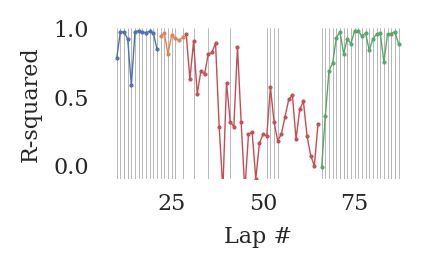

In [17]:
fs, ax = plt.subplots(1, dpi=200)
d_exp.plot_bayesR2(Exp_R2data, ax, traininglaps=10)
fs.set_size_inches((2, 1))
fs.savefig(os.path.join(SaveFigureFolder, 'BayesError_Experiment_CFC4.pdf'), bbox_inches='tight', transparent=True)

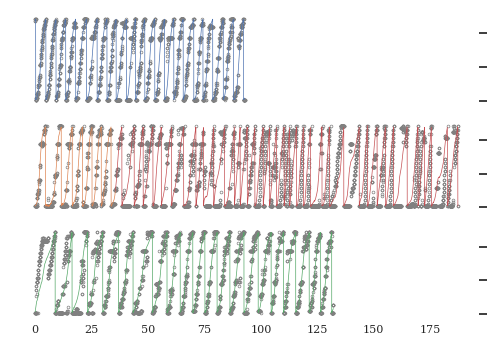

In [18]:
fs, ax = plt.subplots(3, dpi=100, sharex='all', sharey='all')
d_exp.plot_bayesfit(ax)
fs.savefig(os.path.join(SaveFigureFolder, 'BayesFit_Experiment_CFC4.pdf'), bbox_inches='tight', transparent=True)

## Control Animal

In [19]:
CntrlDirectoryName = '/home/sheffieldlab/Desktop/NoReward/ControlData/Dataused/'

### CFC4

In [20]:
cntrltaskframes = {'Task1a': [125, -350],
                   'Task1b': [40, -280]}
cntrltaskstoplot = ['Task1a', 'Task1b']
remove_laps = {'Task1a':0, 'Task1b':7}self

In [21]:
d_cntrl = r(AnimalName='CFC4', FolderName=CntrlDirectoryName,
            SaveFigureFolder=SaveFigureFolder, taskstoplot=cntrltaskstoplot, controlflag=1)
Cntrl_Fdata, Cntrl_Cdata, Control_R2Data = d_cntrl.combinedata_correct_forraster(
    cntrltaskframes, remove_laps)

Loading Data
F (678, 40000)
Fc (678, 40000)
Fc3 (678, 40000)


410.71659134925756
441


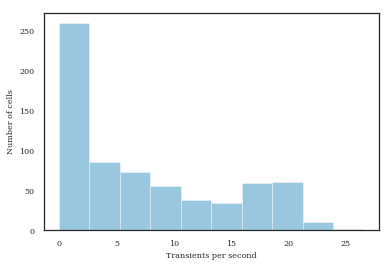

In [22]:
activecells = d_cntrl.find_transient_distribution(Cntrl_Fdata, threshold=0.1, transthreshold=2)
print(np.size(activecells))

In [23]:
Cntrl_Fdata, Cntrl_Cdata = Cntrl_Fdata[activecells, :], Cntrl_Cdata[activecells, :]

In [24]:
d_cntrl.make_rastermap(Cntrl_Fdata, Cntrl_Cdata, ncomp=1)

nmin 200
0.011312484741210938
2.2891435623168945
2.3920938968658447
2.394498109817505
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0711      2
0.02s    10        0.3186      4
0.06s    20        0.3850      8
0.09s    30        0.4356      18
0.10s    40        0.4939      28
0.12s    50        0.4955      28
0.13s   final      0.4955
0.13s upsampled    0.4955
(441, 12724)


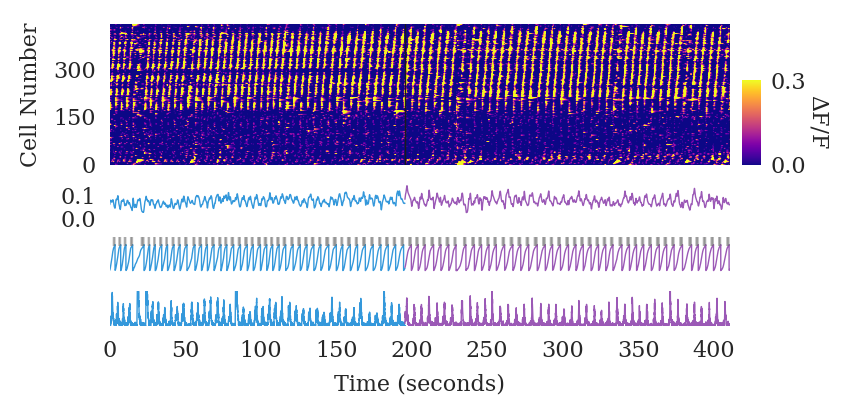

In [25]:
cells_to_use=[[290, 442], [0, 290]]
d_cntrl.crop_Sm_and_sort(cells_to_use=cells_to_use, cdata=Cntrl_Cdata)
fs, ax = plt.subplots(4, sharex='all', dpi = 200, gridspec_kw={'height_ratios':[2, 0.5, 0.5, 0.5], 'hspace':0.3})
d_cntrl.plot_rastermap(fs, ax, fdata=Cntrl_Fdata, crop_cellflag=1, ylim_meandff=0.15)
d_cntrl.plot_samplecells([557], axis=ax[3])
fs.set_size_inches((4, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'RasterMap_CFC4_Control_AllCell_withdff.pdf'), bbox_inches='tight', transparent=True)

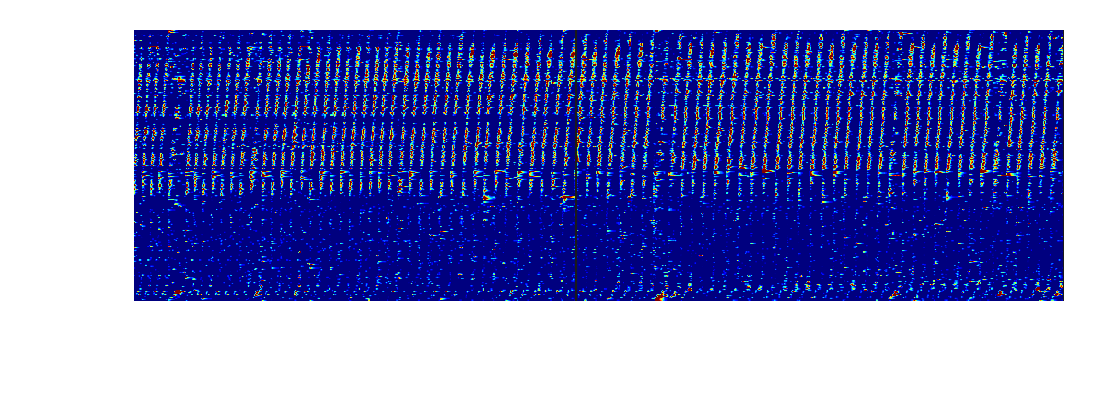

In [26]:
d_cntrl.saveimshow_as_tiff(filename='RasterMap_CFC4_Control_tiff', set_inches=(4, 1.2))

#### Correlation Plot

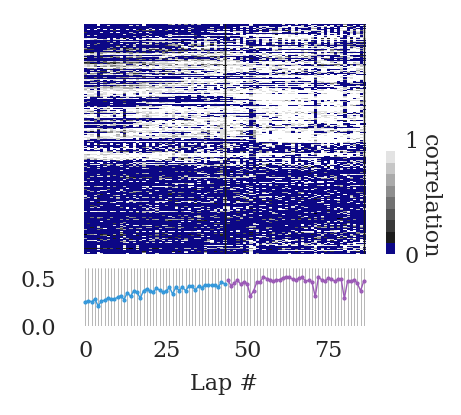

In [27]:
fs, ax = plt.subplots(2, sharex='all', dpi = 200, gridspec_kw={'height_ratios':[2, 0.5], 'hspace':0.1})
d_cntrl.plot_correlation_with_lick_data(fs, Cntrl_Cdata, ax, cmap=greys, cells_to_use=cells_to_use, ylim=0.6)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Correlation_CFC4_Control_Test.pdf'), bbox_inches='tight', transparent=True)

### Bayes Error

Task1a
Task1b


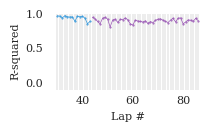

In [28]:
fs, ax = plt.subplots(1, dpi=100)
d_cntrl.plot_bayesR2(Control_R2Data, ax, traininglaps=30)
fs.set_size_inches((2, 1))
fs.savefig(os.path.join(SaveFigureFolder, 'BayesError_Control_CFC4.pdf'), bbox_inches='tight', transparent=True)

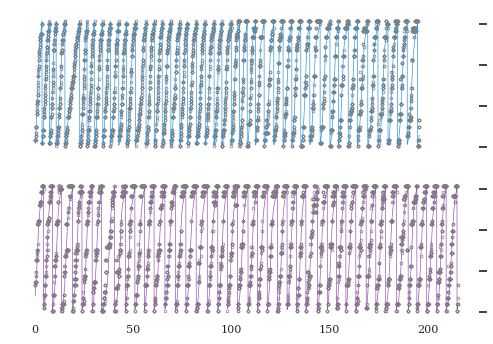

In [29]:
fs, ax = plt.subplots(2, dpi=100, sharex='all', sharey='all')
d_cntrl.plot_bayesfit(ax)
fs.savefig(os.path.join(SaveFigureFolder, 'BayesFit_Control_CFC4.pdf'), bbox_inches='tight', transparent=True)